In [1]:
#Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-90.000, high=90.000, size=1500)
lats_lngs = zip(lats, lngs)
lats_lngs

In [3]:
#Add the latitudes and longitudes to a list
coordinates = list(lats_lngs)

In [4]:
#Use the print() function to display the latitude and longitude combinations
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-26.714878466745155 -21.530755723182068
66.44313102463963 73.21779788554798
29.274661778920162 -66.5535164058611
64.55916985120271 32.64084236573498
4.818938643284326 -85.11669264146585
-40.70440712028985 51.43344786731922
15.327409961047664 77.65972327891464
17.892949319069743 -72.66451721196916
24.315939490207256 45.374740606831125
-6.7891191116952 -50.77470321987293
-74.46456465704959 40.40453674323979
42.60499598322298 19.543001983507907
-2.413003702746707 66.15451989652044
61.274495778732245 -89.28769103223732
64.40048162360858 -58.86758635898381
-21.797805560866323 9.364848225001055
-10.438597637274725 -58.46848494068061
3.8506352135584194 -19.167114814453257
-84.17738294085069 -87.43040920613862
-26.56550897771011 37.89093027458787
-0.767994185746673 -85.53627420135618
31.022002867844492 54.0815166960719
-20.99703458650127 -75.83343931965656
5.262390524532435 54.740059949296636
54.71622922299866 -15.848077012666892
61.99626262753233 75.78129900543675
-4.022265900961898 1.7442457

-29.43499966181399 24.18062320150719
-69.38375591737253 -40.97438735762628
-74.46191446343845 48.85492110563294
-69.31140477984718 -37.09575609299942
-82.56607747649362 -41.87607908308204
-85.42481454341427 -5.00677138569219
-49.69366709005586 -66.59877922656798
76.9518283651685 -79.85545333127314
55.79448020477275 66.42182120889322
-32.03008487947044 55.72906955894885
-6.1585853373543245 38.55039037465508
-31.18415549066266 55.57329534683086
88.9154425793445 -58.70534264623085
37.08935351219711 -41.064411750369096
-36.57849208172533 54.42694818791841
-5.847646854618702 -49.18218667685537
20.420531062614103 40.02305022940291
79.59701941285903 15.54265590392815
-74.52931088374133 -43.94153162673345


In [5]:
pip install citipy

  Using cached citipy-0.0.5.tar.gz (557 kB)
  Using cached kdtree-0.16-py2.py3-none-any.whl (7.7 kB)
  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559701 sha256=ec01ea0493ff3a1acbcfc17e90e190bec791bd0926e0857b6a9844fe90ce4ccd
  Stored in directory: c:\users\carin\appdata\local\pip\cache\wheels\d9\dd\68\8cc0be16282b0fcae5acb7280b47d31952f203c401923a8c1e
Successfully built citipy
Note: you may need to restart the kernel to use updated packages.


In [6]:
#Import citipy module
from citipy import citipy

In [7]:
#Create a list for holding the cities
cities = []

#Identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    #If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
        
#Print the city count to confirm sufficient count
len(cities)

619

In [8]:
#Import the requests library and API key
import requests
from config import weather_api_key

In [9]:
#Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
url = "https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid=" + weather_api_key

In [11]:
#Create an empty list to hold the weather data
city_data = []

#Print the beginning of the logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters
record_count = 1
set_count = 1

#Loop through all the cities in the list
for i, city in enumerate(cities):

    #Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
#Run an API request for each of the cities.
    try:
        #Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        #Convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        #Append the city information into city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

#If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

#Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | staryy nadym
Processing Record 3 of Set 1 | hamilton
Processing Record 4 of Set 1 | muyezerskiy
Processing Record 5 of Set 1 | burica
City not found. Skipping...
Processing Record 6 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 7 of Set 1 | dhone
Processing Record 8 of Set 1 | jacmel
Processing Record 9 of Set 1 | riyadh
Processing Record 10 of Set 1 | sao felix do xingu
Processing Record 11 of Set 1 | port alfred
Processing Record 12 of Set 1 | podgorica
Processing Record 13 of Set 1 | hithadhoo
Processing Record 14 of Set 1 | thompson
Processing Record 15 of Set 1 | sisimiut
Processing Record 16 of Set 1 | henties bay
Processing Record 17 of Set 1 | aripuana
Processing Record 18 of Set 1 | goderich
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | inhambane
Processing Record 21 of Set 1 | san cristobal
Processin

Processing Record 31 of Set 4 | rio branco
Processing Record 32 of Set 4 | matara
Processing Record 33 of Set 4 | jalu
Processing Record 34 of Set 4 | zherdevka
Processing Record 35 of Set 4 | khambhat
Processing Record 36 of Set 4 | awjilah
Processing Record 37 of Set 4 | east london
Processing Record 38 of Set 4 | gilbues
Processing Record 39 of Set 4 | ormara
Processing Record 40 of Set 4 | esmeralda
Processing Record 41 of Set 4 | itacare
Processing Record 42 of Set 4 | manakara
Processing Record 43 of Set 4 | richards bay
Processing Record 44 of Set 4 | nanortalik
Processing Record 45 of Set 4 | sur
Processing Record 46 of Set 4 | victoria
Processing Record 47 of Set 4 | dabat
Processing Record 48 of Set 4 | mattru
Processing Record 49 of Set 4 | mitsamiouli
Processing Record 50 of Set 4 | at-bashi
Processing Record 1 of Set 5 | enkoping
Processing Record 2 of Set 5 | kharp
Processing Record 3 of Set 5 | sarahan
Processing Record 4 of Set 5 | pangody
Processing Record 5 of Set 5 |

Processing Record 20 of Set 8 | madimba
Processing Record 21 of Set 8 | arlit
Processing Record 22 of Set 8 | kilindoni
Processing Record 23 of Set 8 | kazalinsk
City not found. Skipping...
Processing Record 24 of Set 8 | krasnousolskiy
City not found. Skipping...
Processing Record 25 of Set 8 | berlevag
Processing Record 26 of Set 8 | kalmunai
Processing Record 27 of Set 8 | sosnovskiy
City not found. Skipping...
Processing Record 28 of Set 8 | fort-shevchenko
Processing Record 29 of Set 8 | joaima
Processing Record 30 of Set 8 | biltine
Processing Record 31 of Set 8 | meulaboh
Processing Record 32 of Set 8 | doische
Processing Record 33 of Set 8 | virginia beach
Processing Record 34 of Set 8 | bosanski brod
Processing Record 35 of Set 8 | robertsport
Processing Record 36 of Set 8 | leh
Processing Record 37 of Set 8 | guarapari
Processing Record 38 of Set 8 | chimore
Processing Record 39 of Set 8 | camabatela
Processing Record 40 of Set 8 | carutapera
Processing Record 41 of Set 8 | s

Processing Record 9 of Set 12 | alta floresta
Processing Record 10 of Set 12 | iquitos
Processing Record 11 of Set 12 | constantine
Processing Record 12 of Set 12 | saryshagan
City not found. Skipping...
Processing Record 13 of Set 12 | belyy yar
Processing Record 14 of Set 12 | khalkhal
Processing Record 15 of Set 12 | krasnotorka
Processing Record 16 of Set 12 | nacala
Processing Record 17 of Set 12 | kedougou
Processing Record 18 of Set 12 | maraa
Processing Record 19 of Set 12 | chongwe
Processing Record 20 of Set 12 | gavar
Processing Record 21 of Set 12 | montepuez
Processing Record 22 of Set 12 | yeltsovka
City not found. Skipping...
Processing Record 23 of Set 12 | iisalmi
Processing Record 24 of Set 12 | amilly
Processing Record 25 of Set 12 | champua
Processing Record 26 of Set 12 | vavuniya
Processing Record 27 of Set 12 | atbasar
Processing Record 28 of Set 12 | verkhniy uslon
Processing Record 29 of Set 12 | tanout
Processing Record 30 of Set 12 | skibotn
Processing Record

In [12]:
len(city_data)

563

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.0970,-79.2353,292.95,52,100,3.09,US,2022-05-24 20:55:51
1,Staryy Nadym,65.6118,72.6842,279.73,77,8,3.26,RU,2022-05-24 20:56:10
2,Hamilton,39.1834,-84.5333,298.57,58,77,1.79,US,2022-05-24 20:55:45
3,Muyezerskiy,63.9333,31.6500,275.53,79,0,2.12,RU,2022-05-24 20:56:11
4,Dhone,15.4167,77.8833,302.18,61,23,7.32,IN,2022-05-24 20:56:12
5,Jacmel,18.2342,-72.5347,304.06,70,97,3.06,HT,2022-05-24 20:56:13
6,Riyadh,24.6877,46.7219,302.23,16,0,4.19,SA,2022-05-24 20:54:52
7,Sao Felix Do Xingu,-6.6447,-51.9950,298.94,76,27,1.63,BR,2022-05-24 20:54:21
8,Port Alfred,-33.5906,26.8910,289.36,91,78,5.08,ZA,2022-05-24 20:56:13
9,Podgorica,42.4411,19.2636,295.03,60,0,3.60,ME,2022-05-24 20:56:14


In [14]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jamestown,US,2022-05-24 20:55:51,42.0970,-79.2353,292.95,52,100,3.09
1,Staryy Nadym,RU,2022-05-24 20:56:10,65.6118,72.6842,279.73,77,8,3.26
2,Hamilton,US,2022-05-24 20:55:45,39.1834,-84.5333,298.57,58,77,1.79
3,Muyezerskiy,RU,2022-05-24 20:56:11,63.9333,31.6500,275.53,79,0,2.12
4,Dhone,IN,2022-05-24 20:56:12,15.4167,77.8833,302.18,61,23,7.32
...,...,...,...,...,...,...,...,...,...
558,Ritchie,ZA,2022-05-24 21:12:50,-29.0380,24.6028,288.03,50,0,2.41
559,Mokrousovo,RU,2022-05-24 21:12:51,55.8103,66.7653,288.08,58,82,4.13
560,Mvomero,TZ,2022-05-24 21:12:51,-6.2500,38.6667,295.56,96,47,0.98
561,Maraba,BR,2022-05-24 21:12:52,-5.3686,-49.1178,303.25,66,20,1.54


In [15]:
#Create the output file (CSV)
output_data_file = "weather_data/cities.csv"
#Export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
#Extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [17]:
#Import the time module
import time
#Get today's date in seconds
today = time.strftime("%x")
today

'05/24/22'

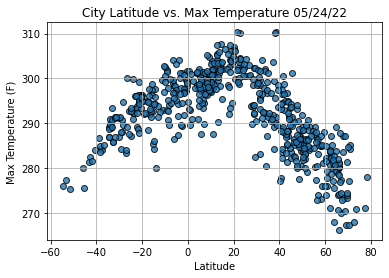

In [18]:
#Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig1.png")

#Show plot
plt.show()

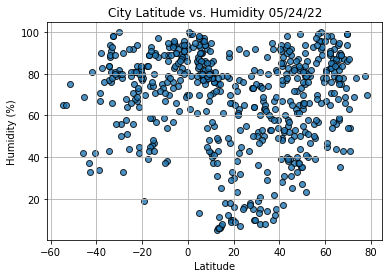

In [19]:
#Build the scatter plots for latitude vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig2.png")

#Show plot
plt.show()

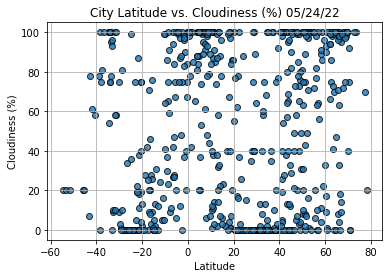

In [20]:
#Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig3.png")

#Show plot
plt.show()

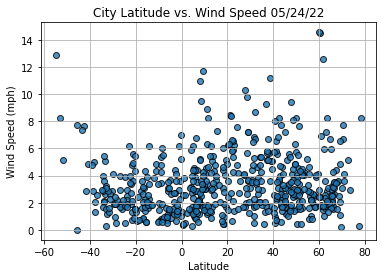

In [21]:
#Build the scatter plots for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure
plt.savefig("weather_data/Fig4.png")

#Show plot
plt.show()

In [22]:
#Import linregress
from scipy.stats import linregress

#Create a function to create perform linear regression on the weather data
#and plot a regression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    #Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    #Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    
    #Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    #Create a scatter plot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    #Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
#Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

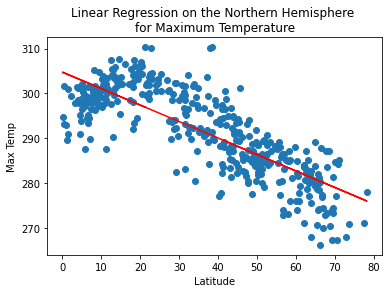

In [24]:
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 'Max Temp', (10,40))

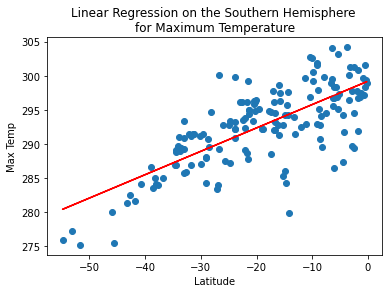

In [25]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,90))

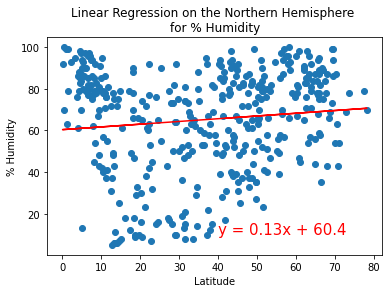

In [26]:
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

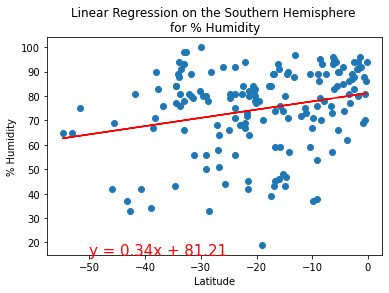

In [27]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

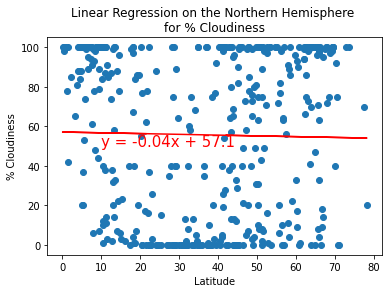

In [28]:
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(10,50))

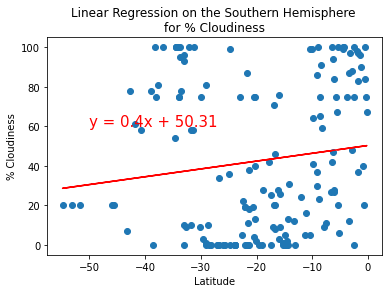

In [29]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

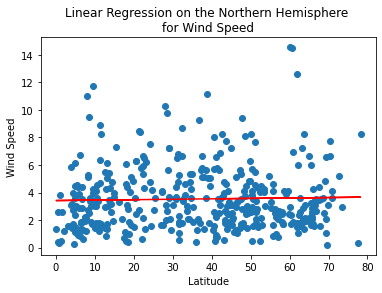

In [30]:
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 'Wind Speed',(40,35))

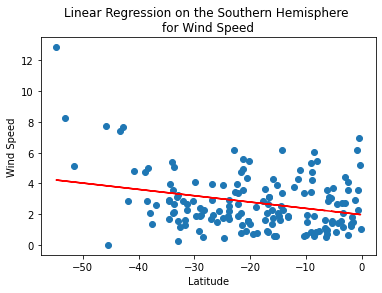

In [31]:
#Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

#Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,35))